In [32]:
# Import dependencies
import csv
import os
import re
import pandas as pd
import seaborn as sns

In [33]:
STOPWORDS = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [2]:
# File paths
path='./learn-ai-bbc'
train_path=os.path.join(path, 'BBC News Train.csv')
test_path=os.path.join(path, 'BBC News Test.csv')
sample_solution_path=os.path.join(path, 'BBC News Sample Solution.csv')

In [3]:
# Import Data
train_df=pd.read_csv(train_path)
test_df=pd.read_csv(test_path)
solution_df=pd.read_csv(sample_solution_path)

In [4]:
# The solution dataset
solution_df

,ArticleId,Category
0,1018,sport
1,1319,tech
2,1138,business
3,459,entertainment
4,1020,politics
...,...,...
730,1923,sport
731,373,tech
732,1704,business
733,206,entertainment


In [5]:
# Train dataset
train_df

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [6]:
print(f'Train dataset columns: \n{train_df.columns}')

Train dataset columns: 
Index(['ArticleId', 'Text', 'Category'], dtype='object')


In [7]:
train_df.describe()

,ArticleId
count,1490.000000
mean,1119.696644
std,641.826283
min,2.000000
25%,565.250000
50%,1112.500000
75%,1680.750000
max,2224.000000


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [10]:
# Remove repeated articles
num_unique=train_df["ArticleId"].nunique()
total_num=train_df.shape[0]
print(f'Number of unique articles: {num_unique}')
print(f'Number of articles in total: {total_num}')

if num_unique==total_num:
    print('There is no repeated articles')
else:
    print(f'{total_num-num_unique} articles were removed since they are repeated')

train_df.drop_duplicates()

Number of unique articles: 1490
Number of articles in total: 1490
There is no repeated articles


,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [11]:
# Possible categories
train_df['Category'].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [12]:
print('Each datapoint looks like this:')
train_df['Text'][0]

Each datapoint looks like this:


'worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by worldcom. mr ebb

In [40]:
sns.set_theme()

[Text(0.5, 1.0, 'Number of articles of each category')]

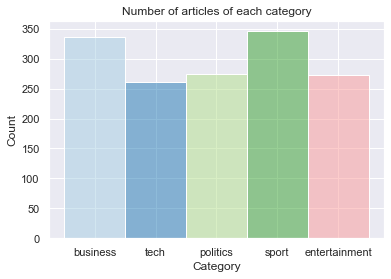

In [41]:
sns.histplot(data=train_df, x='Category', hue='Category', legend=False, palette='Paired').set(title='Number of articles of each category')

In [19]:
def remove_punctuation(df):
    removed_punctuation=df.copy()
    removed_punctuation['Text']=df["Text"].apply(lambda x: re.sub(r'[^\w\s]+', '', x))
    return removed_punctuation

In [20]:
def remove_numbers(df):
    removed_numbers=df.copy()
    removed_numbers['Text']=df['Text'].apply(lambda x: re.sub(r'[0-9]+', '', x))
    return removed_numbers

In [34]:
def remove_stopwords(df):
    removed_stopwords=df.copy()
    removed_stopwords['Text']=df['Text'].apply(lambda x: ' '.join(word.lower() for word in x.split(' ') if word not in STOPWORDS))
    return removed_stopwords

In [22]:
def remove_extra_spaces(df):
    removed_spaces=df.copy()
    removed_spaces['Text']=df['Text'].apply(lambda x: re.sub(' +', ' ', x))
    return removed_spaces

In [23]:
def clean_data(df):
    
    df=remove_punctuation(df)
    df=remove_numbers(df)
    df=remove_stopwords(df)
    df=remove_extra_spaces(df)

    return df

In [35]:
cleaned_df=clean_data(train_df)

print('Cleaned Train dataset:')
cleaned_df

Cleaned Train dataset:


,ArticleId,Text,Category
0,1833,worldcom exboss launches defence lawyers defen...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens maj...,business
3,1976,lifestyle governs mobile choice faster better ...,tech
4,917,enron bosses m payout eighteen former enron di...,business
...,...,...,...
1485,857,double eviction big brother model caprice holb...,entertainment
1486,325,dj double act revamp chart show dj duo jk joel...,entertainment
1487,1590,weak dollar hits reuters revenues media group ...,business
1488,1587,apple ipod family expands market apple expande...,tech


In [38]:
num_words=pd.DataFrame()
num_words[['ArticleId', 'Category']]=cleaned_df[['ArticleId', 'Category']]
num_words['Words']=list(map(lambda x: len(x), cleaned_df['Text']))

[Text(0.5, 1.0, 'Number of words per article')]

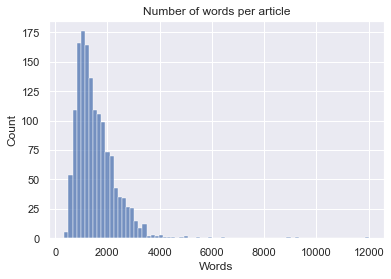

In [42]:
sns.histplot(data=num_words, x='Words', palette='Paired').set(title='Number of words per article')

[Text(0.5, 1.0, 'Number of words per category')]

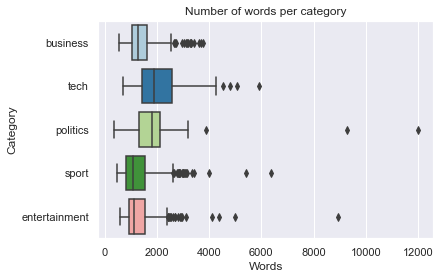

In [44]:
sns.boxplot(data=num_words, x='Words', y='Category', palette='Paired').set(title='Number of words per category')